In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Učitavamo podatke
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.columns.values

array(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'num'], dtype=object)

# Objašnjenje značajki
- id = redni broj pacijenta
- age = dob pacijenta
- sex = spol
- dataset = iz kojeg dataseta je podatak
- cp = vrsta boli u prsima (chestpain)
- trestbps = otkucaji srca u mirovanju
- chol = kolesterol u mg/dl
- fbs = povišen šećer > 120 mg/dl (fasting blood sugar)
- restecg = rezultati EKG-a u mirovanju
- thalch = najveći postignuti broj otkucaja srca
- exang = vježbom uzrokovana angina
- oldpeak = depresija ST segmenta uzrokovana vježbom u usporedbi s mirovanjem
- slope = krivulja ST segmenta na vrhuncu tjelovježbe
- ca = broj obojanih velikih krvnih žila
- thal = poremećaj krvi, talasemija
- num = prošireni target, razina srčane bolesti

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

# Preprocessing
Vidimo da većina podataka nije numerička. Uvelike nam pomaže činjenica što su sve ostale varijable kategoričke s dosta malim brojem kategorija, što možemo jednostavno pretvoriti u numeričke. Provjerit ćemo prvo postojanje monotonih stributa, nedostajućih i stršećih vrijednosti, pa ćemo korištenjem LabelEncoder-a pretvoriti kategoričke varijable u numeričke.

In [6]:
df['id']

0        1
1        2
2        3
3        4
4        5
      ... 
915    916
916    917
917    918
918    919
919    920
Name: id, Length: 920, dtype: int64

In [7]:
# 'id' je monotoni atribut, pa ga možemo izbaciti
df.drop(columns = 'id', inplace = True)

Pogledajmo kakva je situacija s nedostajućim vrijednostima

In [8]:
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Odmah primijećujemo tri značajke s jako velikim brojem nedostajućih vrijednosti. Pogledajmo još što se događa sa značajkom 'chol'

173
172


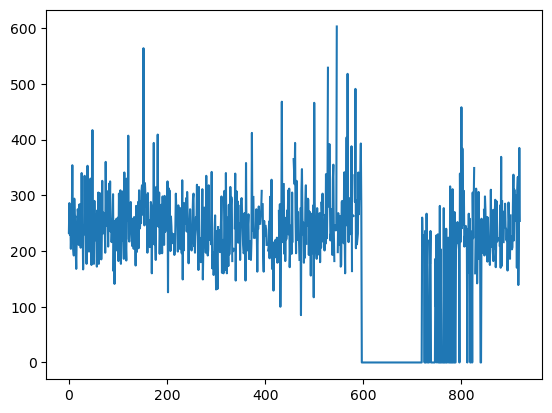

In [9]:
plt.plot(df['chol'])
print((df['chol'] < 100).sum())
print((df['chol'] < 10).sum())

Osim nedostajućih vrijednosti, vidimo da ovdje imamo velik broj 0, što nikako nema smisla za razinu kolesterola u krvi. Ono što također možemo primijetiti je da su nule vrlo blizu jedna drugoj. Pretpostavljam da u nekim datasetovima jednostavno nisu bilježili kolesterol, nego pisali 0, ali provjerimo to.

In [10]:
print(df.loc[df['chol'] == 0, 'dataset'].nunique())
df.loc[df['chol'] == 0, 'dataset']

2


597      Switzerland
598      Switzerland
599      Switzerland
600      Switzerland
601      Switzerland
           ...      
818    VA Long Beach
819    VA Long Beach
822    VA Long Beach
839    VA Long Beach
840    VA Long Beach
Name: dataset, Length: 172, dtype: object

Dakle, datasetovi 'Switzerland' i 'VA Long Beach' imaju minimalno 4 značajke s velikom količinom nedostajućih vrijednosti. S obzirom da imamo uvid i u članak, možemo se zapitati zašto je autor koristio samo 'Cleveland' dataset. Provjerimo broj nedostajućih vrijednosti za datasetove iz Clevelanda i Mađarske

In [11]:
df.loc[df['dataset'] == 'Hungary', :].isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalch        1
exang         1
oldpeak       0
slope       189
ca          290
thal        265
num           0
dtype: int64

In [12]:
df.loc[df['dataset'] == 'Cleveland', :].isna().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
dtype: int64

Da se ne moramo boriti s ogromnom količinom nedostajućih vrijednosti, pretpostavljajući da je uzorak koji imamo iz dataseta u Clevelandu dovoljno reprezentativan, postupit ćemo isto kao autori članka i promatrati samo dataset Cleveland

In [13]:
df = df.loc[df['dataset'] == 'Cleveland', :]
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [14]:
df.shape

(304, 15)

In [15]:
# 'dataset' sada ima jednu vrijednost, pa možemo obrisati tu značajku
df.drop(columns = 'dataset', inplace = True)

Sada imamo samo nekoliko nedostajućih vrijednosti, pa ćemo samo izbaciti primjere s nedostajućim vrijednostima.

In [16]:
df = df.loc[df['ca'].notnull(), :]
df = df.loc[df['thal'].notnull(), :]
# Ne moramo izbaciti nedostajuću vrijednost u slope jer se preklapa s preostale dvije
df = df.reset_index(drop = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Pogledajmo kandidate za stršeće vrijednosti

In [17]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [18]:
print((df['chol'] > 400).sum())
print((df['chol'] > 450).sum())
print((df['chol'] > 500).sum())
print((df['chol'] > 550).sum())

4
1
1
1


Vrijednost od 564 za kolesterol je kandidat za stršeću vrijednost, ali ćemo zasad ostaviti tako

Čini se da u podacima nema nekonzistentnosti. Značajke koje nisu numeričke se sastoje od samo nekolicine različitih vrijednosti, pa im možemo dati numeričke vrijednosti. Koristiti ćemo LabelEncoder.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    object 
 6   restecg   297 non-null    object 
 7   thalch    297 non-null    float64
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    float64
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 32.6+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
# inicijalizacija encodera
non_numeric_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in non_numeric_columns:
    le = LabelEncoder()
    le.fit(df[col])

    df[col] = le.transform(df[col])

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


# Objašnjenje oznaka LabelEncodera
- sex - 0 = Female, 1 = Male
- cp - 0 = asymptomatic, 1 = atypical angina, 2 = non-anginal, 3 = typical angina
- fbs - 0 = False, 1 = True
- restecg - 0 = lv hypertrophy, 1 = normal, 2 = st-t abnormality
- exang - 0 = False, 1 = True
- slope - 0 = downsloping, 1 = flat, 2 = upsloping
- thal - 0 = fixed defect, 1 = normal, 2 = reversable defect

In [22]:
df.info()
# Sada su nam sve značajke numeričke

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int32  
 2   cp        297 non-null    int32  
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    int32  
 6   restecg   297 non-null    int32  
 7   thalch    297 non-null    float64
 8   exang     297 non-null    int32  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int32  
 11  ca        297 non-null    float64
 12  thal      297 non-null    int32  
 13  num       297 non-null    int64  
dtypes: float64(5), int32(7), int64(2)
memory usage: 24.5 KB


Ono što još možemo primijetiti je da umjesto očekivane binarne oznake u 'num' imamo više od dvije klase, odnosno rangirane od 0 do 4 po  razini srčane bolesti. Dodat ćemo još jedan stupac koji će bilježiti samo jel osoba dobila bolest ili nije, kako bi podatci odgovarali onima u članku.

In [23]:
df['target'] = df.loc[df['num'] == 0, 'num']
df.loc[df['target'].isna(), 'target'] = 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0,0.0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2,1.0
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1,1.0
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0,0.0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0,0.0


# Vizualizacija

Vrijeme je da se bolje upoznamo s podacima. Vizualizirat ćemo distribucije numeričkih varijabli i vizualno provjeriti odnose između određenih značajki. 

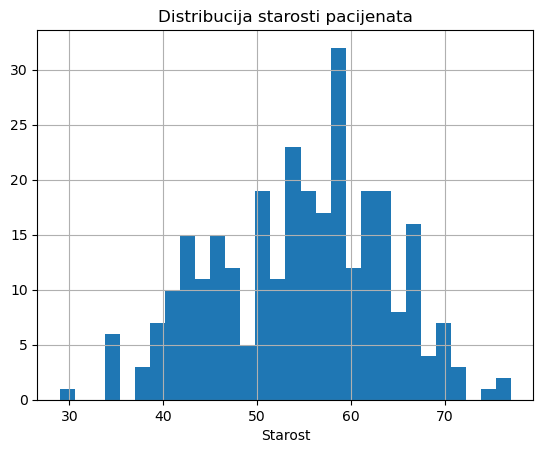

In [24]:
plt.hist(df['age'], bins = 30)
plt.title('Distribucija starosti pacijenata')
plt.xlabel('Starost')
plt.grid()
plt.show()

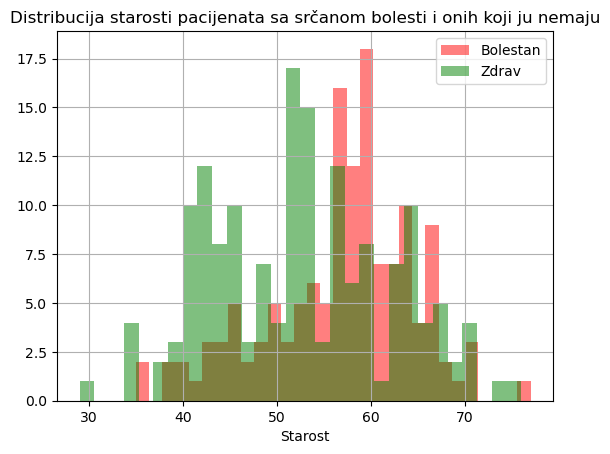

In [25]:
# Pogledajmo distribuciju varijable 'age' za one koji su dobili srčanu bolest i za one koji nisu
plt.hist(df.loc[df['target'] == 1, 'age'], bins = 30, color = 'red', alpha = 0.5, label = 'Bolestan')
plt.hist(df.loc[df['target'] == 0, 'age'], bins = 30, color = 'green', alpha = 0.5, label = 'Zdrav')
plt.title('Distribucija starosti pacijenata sa srčanom bolesti i onih koji ju nemaju')
plt.xlabel('Starost')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Vidimo da je veći broj starijih srčanih bolesnika, ali da se i mlađi ljudi razboljevaju

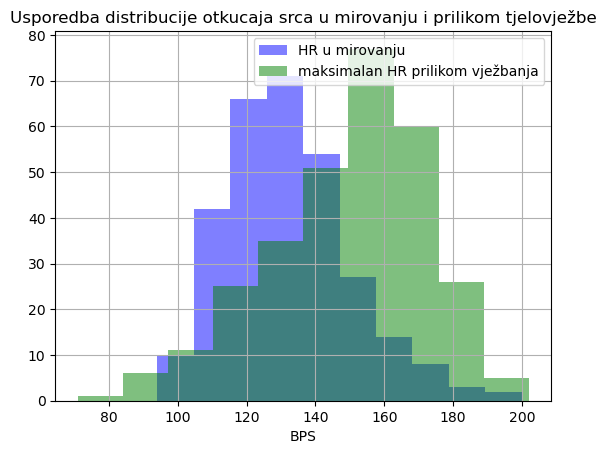

In [26]:
# Odnos distribucije otkucaja srca u mirovanju i u tjelovježbi
plt.hist(df['trestbps'], bins = 10, color = 'blue', alpha = 0.5, label = 'HR u mirovanju')
plt.hist(df['thalch'], bins = 10, color = 'green', alpha = 0.5, label = 'maksimalan HR prilikom vježbanja')
plt.title('Usporedba distribucije otkucaja srca u mirovanju i prilikom tjelovježbe')
plt.xlabel('BPS')
plt.legend(loc = 'best')
plt.grid()
plt.show()

          trestbps    thalch
trestbps  1.000000 -0.049108
thalch   -0.049108  1.000000


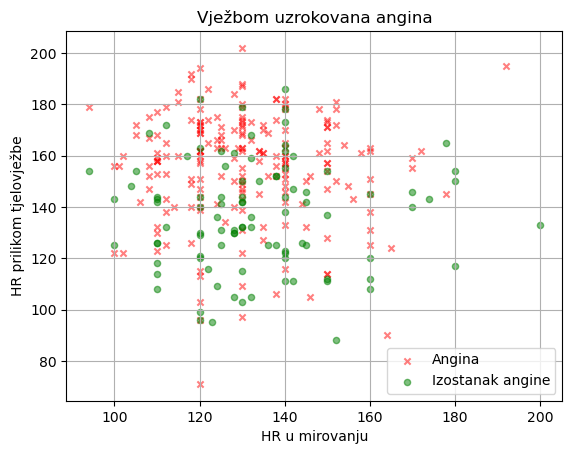

In [29]:
print(df[['trestbps', 'thalch']].corr())
# Vidimo da broj otkucaja u mirovanju ne korelira s onim u tjelovježbi, ali utječe li na anginu tijekom tjelovježbe?
mask_exang = df['exang'] == 1

plt.scatter(df.loc[~mask_exang,'trestbps'], df.loc[~mask_exang,'thalch'], s = 20, alpha = 0.5, c = 'r', marker = 'x', label = 'Angina')
plt.scatter(df.loc[mask_exang,'trestbps'], df.loc[mask_exang,'thalch'], s = 20, alpha = 0.5, c = 'g', label = 'Izostanak angine')
plt.xlabel('HR u mirovanju')
plt.ylabel('HR prilikom tjelovježbe')
plt.title('Vježbom uzrokovana angina')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Nakon što smo analizirali podatke o otkucajima srca, pogledajmo one o razini kolesterola u krvi. U opisu dataseta smo vidjeli da se većina podataka nalazi u vrlo uskom rasponu što možemo dobro prikazati kutijastim dijagramom. Možemo analizirati imaju li muškarci veću tendenciju povećanog kolesterola u krvi tako da prikažemo distribuciju po spolovima. Još nešto što bi nas moglo zanimati je kako starost i kolesterol u krvi utječu na vjerojatnost srčane bolesti.

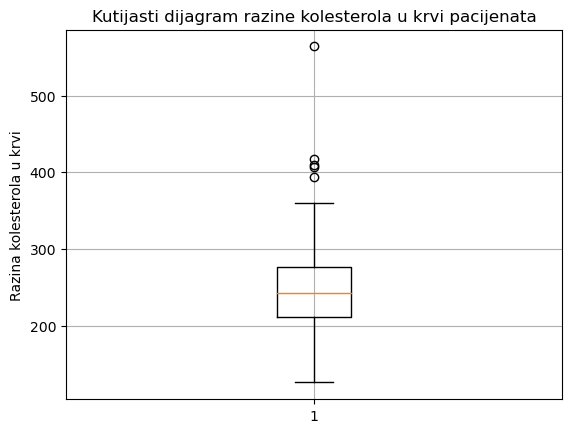

In [30]:
plt.boxplot(df['chol'])
plt.ylabel('Razina kolesterola u krvi')
plt.title('Kutijasti dijagram razine kolesterola u krvi pacijenata')
plt.grid()
plt.show()
# ovako još jednom potvrđujemo stršeću vrijednost koju smo prije spominjali

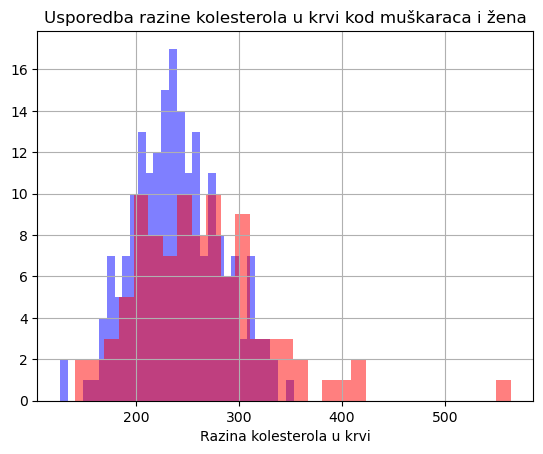

In [31]:
# Pogledajmo histograme distribucije varijable 'chol' s obzirom spol pacijenta
plt.hist(df.loc[df['sex'] == 1, 'chol'], bins = 30, color = 'blue', alpha = 0.5, label = 'Male')
plt.hist(df.loc[df['sex'] == 0, 'chol'], bins = 30, color = 'red', alpha = 0.5, label = 'Female')
plt.xlabel('Razina kolesterola u krvi')
plt.title('Usporedba razine kolesterola u krvi kod muškaraca i žena')
plt.grid()
plt.show()

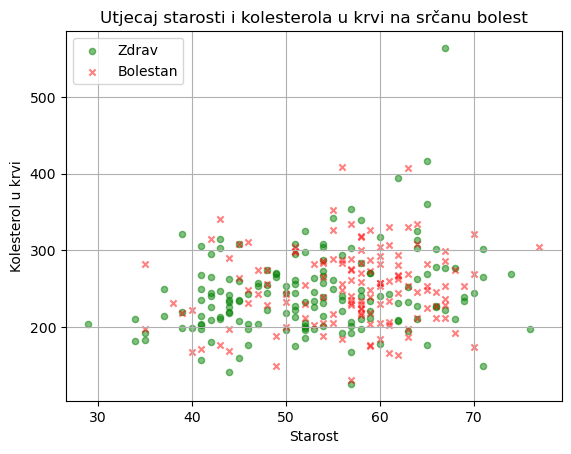

In [32]:
mask_target = df['target'] == 1

plt.scatter(df.loc[~mask_target,'age'], df.loc[~mask_target,'chol'], s = 20, alpha = 0.5, c = 'g', label = 'Zdrav')
plt.scatter(df.loc[mask_target,'age'], df.loc[mask_target,'chol'], s = 20, alpha = 0.5, c = 'r', marker = 'x', label = 'Bolestan')
plt.title('Utjecaj starosti i kolesterola u krvi na srčanu bolest')
plt.xlabel('Starost')
plt.ylabel('Kolesterol u krvi')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Pogledajmo sada s kolika je frekvencija pacijenata s određenom boli u prsima i kakav je to imalo ishod


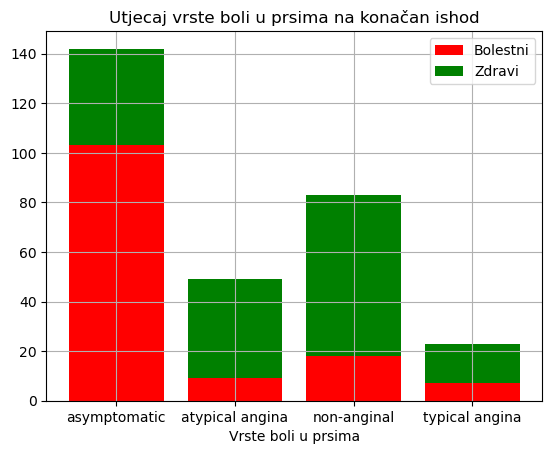

In [33]:
mask_sickness = df['target'] == 1
count_per_cp_sick = df.loc[mask_sickness].groupby('cp').count().loc[:,'target'].values
count_per_cp_notsick = df.loc[~mask_sickness].groupby('cp').count().loc[:,'target'].values

# na x-os ćemo staviti što znače numeričke vrijednosti koje sada imamo u tablici
cps = np.array(['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'])

plt.bar(cps, count_per_cp_sick, color = 'r', label = 'Bolestni')
plt.bar(cps, count_per_cp_notsick, color = 'g', label = 'Zdravi', bottom = count_per_cp_sick)
plt.title('Utjecaj vrste boli u prsima na konačan ishod')
plt.legend(loc = 'best')
plt.xlabel('Vrste boli u prsima')
plt.grid()
plt.show()

Značajke 'restecg', 'oldpeak' i 'slope' su nastale mjerenjima EKG-a. Imalo bi smisla da su one nekako međusobno povezane i da utječu na 'target'. Pogledajmo kako to vizualno izgleda.

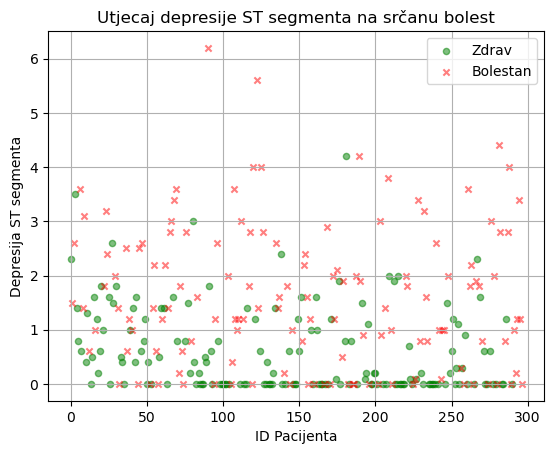

In [35]:
mask_target = df['target'] == 1

plt.scatter(df.loc[~mask_target,'oldpeak'].index, df.loc[~mask_target,'oldpeak'], s = 20, alpha = 0.5, c = 'g', label = 'Zdrav')
plt.scatter(df.loc[mask_target,'oldpeak'].index, df.loc[mask_target,'oldpeak'], s = 20, alpha = 0.5, c = 'r', marker = 'x', label = 'Bolestan')
plt.title('Utjecaj depresije ST segmenta na srčanu bolest')
plt.xlabel('ID Pacijenta')
plt.ylabel('Depresija ST segmenta')
plt.legend(loc = 'best')
plt.grid()
plt.show()

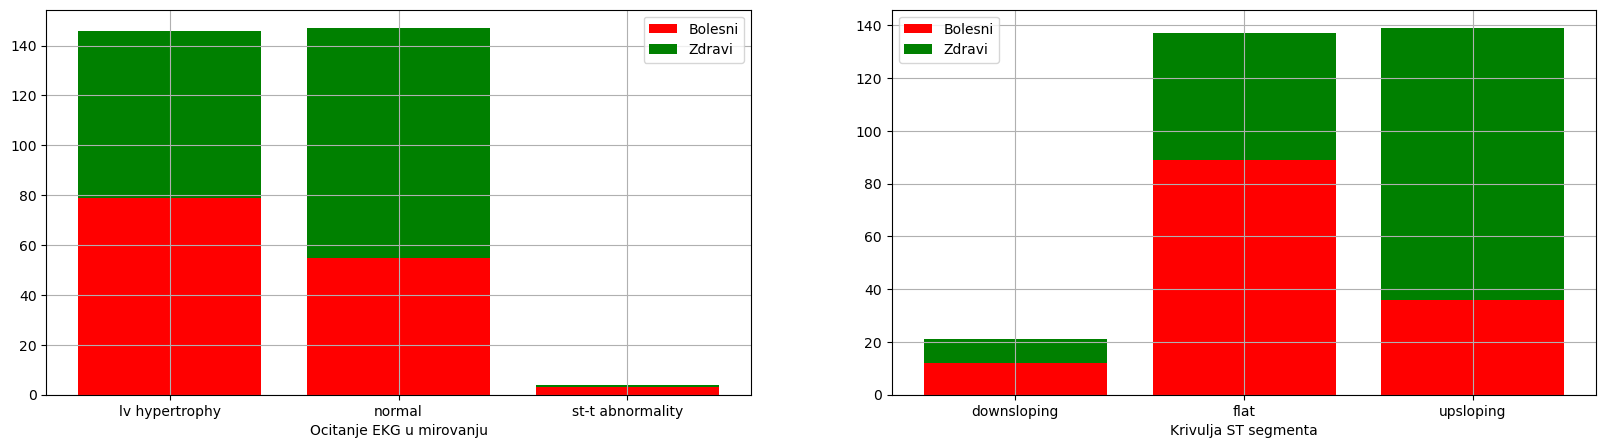

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5)) 
mask_sickness = df['target'] == 1
count_per_restecg_sick = df.loc[mask_sickness].groupby('restecg').count().loc[:,'target'].values
count_per_restecg_notsick = df.loc[~mask_sickness].groupby('restecg').count().loc[:,'target'].values

count_per_slope_sick = df.loc[mask_sickness].groupby('slope').count().loc[:,'target'].values
count_per_slope_notsick = df.loc[~mask_sickness].groupby('slope').count().loc[:,'target'].values

# na x-os ćemo staviti što znače numeričke vrijednosti koje sada imamo u tablici
restecgs = np.array(['lv hypertrophy', 'normal', 'st-t abnormality'])
slopes = np.array(['downsloping', 'flat', 'upsloping'])

ax[0].bar(restecgs, count_per_restecg_sick, color = 'r', label = 'Bolesni')
ax[0].bar(restecgs, count_per_restecg_notsick, color = 'g', label = 'Zdravi', bottom = count_per_restecg_sick)
ax[0].set_xlabel('Ocitanje EKG u mirovanju')
ax[0].legend(loc = 'best')
ax[0].grid()

ax[1].bar(slopes, count_per_slope_sick, color = 'r', label = 'Bolesni')
ax[1].bar(slopes, count_per_slope_notsick, color = 'g', label = 'Zdravi', bottom = count_per_slope_sick)
ax[1].set_xlabel('Krivulja ST segmenta')
ax[1].legend(loc = 'best')
ax[1].grid()
plt.show()

Upoznali smo se s podacima, vizualizirali njihove distribucije i međusobnu ovisnost, posebice s ciljnom značajkom. Pogledajmo još za kraj graf korelacije značajki.

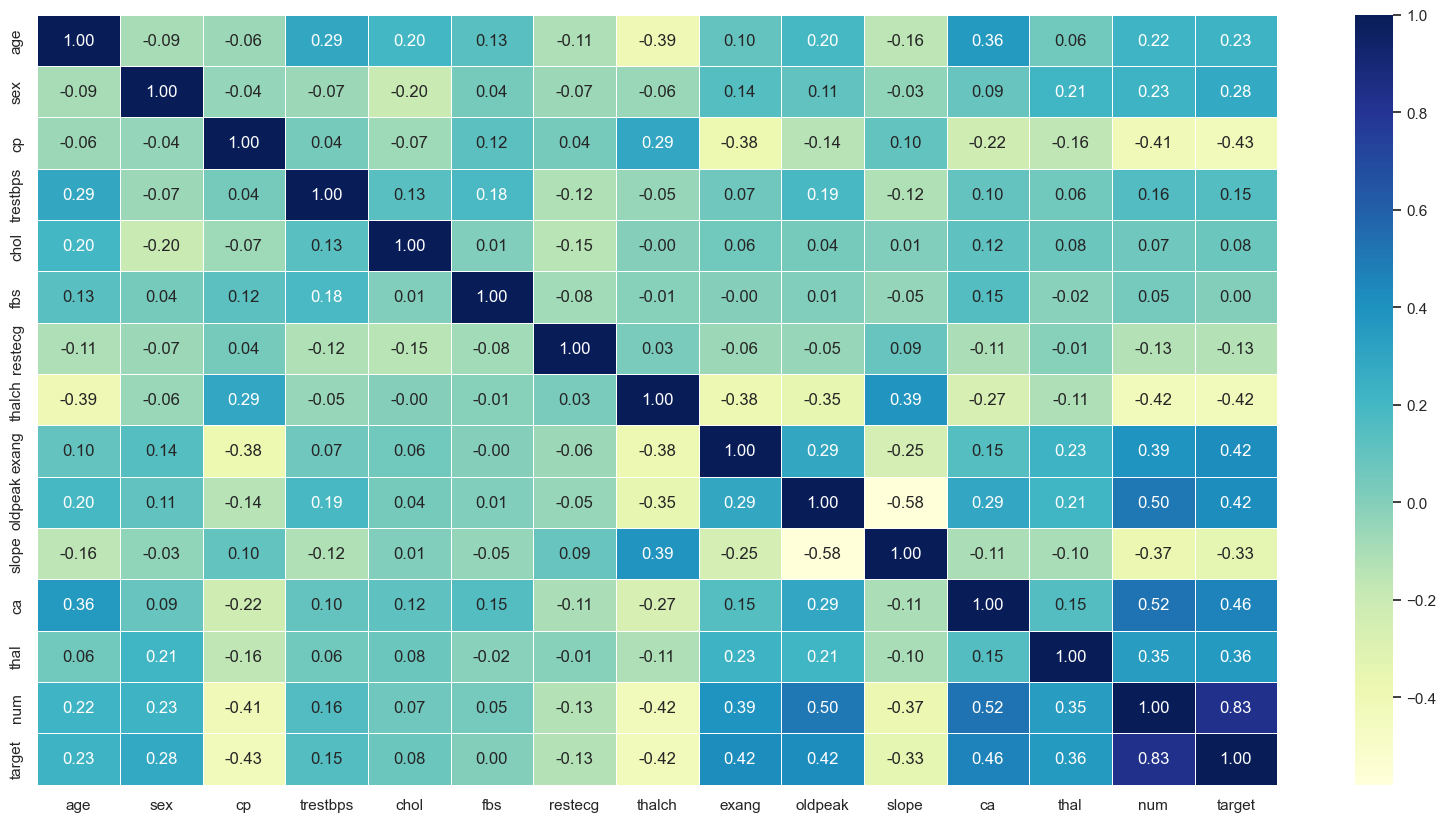

In [78]:
sns.set(rc = {'figure.figsize': (20, 10)})

sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "YlGnBu", linewidths = .5)
plt.show()

Vidimo da 'target' najviše korelira s 'num', što je logično jer smo jedno izvukli iz drugoga, ali isto tako možemo primijetiti da postoje značajke s kojima korelira jako slabo ili nikako. Treba istaknuti s varijablama 'exang', 'oldpeak', 'ca' i 'thal', te negativnu korelaciju s 'thalch', 'slope' i zanimljivo s 'cp'. Kao što smo vidjeli na grafu iznad, većina oboljelih nije imala nikakve simptome, pa se posljedično vjerojatno nisu ni lječili.<br>